EOQ: 275.13632984395207
Optimal Order Quantity (Newsvendor Model): 192.26630087873644
Reorder Point: 142.32201101890323, Order Quantity: 275.13632984395207


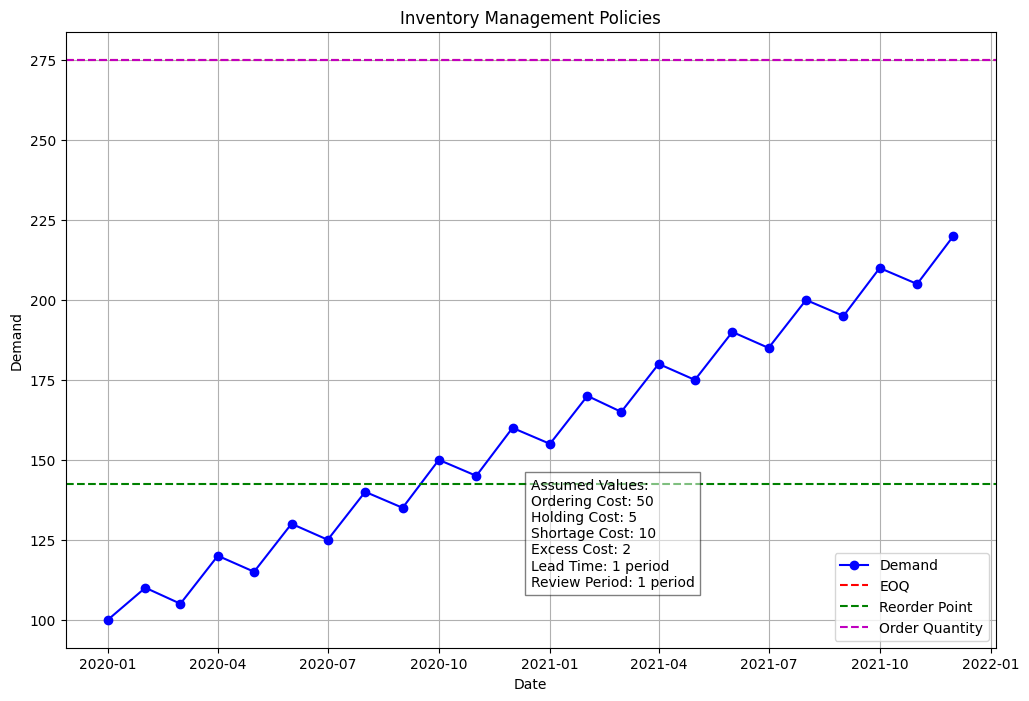

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Load and Prepare Data
data = pd.read_csv('inventory_data.csv', parse_dates=['date_column'], index_col='date_column')
data.index.freq = 'MS'  # Explicitly set the frequency to 'Monthly Start'

# Step 2: Economic Order Quantity (EOQ) Model
def eoq_model(demand, ordering_cost, holding_cost):
    return np.sqrt((2 * demand * ordering_cost) / holding_cost)

annual_demand = data['demand'].sum()
ordering_cost = 50  # example ordering cost
holding_cost = 5  # example holding cost per unit per year

eoq = eoq_model(annual_demand, ordering_cost, holding_cost)
print(f"EOQ: {eoq}")

# Step 3: Single-Period Inventory Model (Newsvendor Model)
def newsvendor_model(mean_demand, std_dev, shortage_cost, excess_cost):
    critical_ratio = shortage_cost / (shortage_cost + excess_cost)
    safety_factor = norm.ppf(critical_ratio)
    return mean_demand + safety_factor * std_dev

mean_demand = data['demand'].mean()
std_dev_demand = data['demand'].std()
shortage_cost = 10  # example shortage cost per unit
excess_cost = 2  # example excess cost per unit

optimal_order_quantity = newsvendor_model(mean_demand, std_dev_demand, shortage_cost, excess_cost)
print(f"Optimal Order Quantity (Newsvendor Model): {optimal_order_quantity}")

# Step 4: Multi-Period Inventory Model (s, Q model)
def multi_period_inventory_model(demand, lead_time, review_period, holding_cost, shortage_cost):
    avg_demand_per_period = demand.mean()
    std_dev_demand_per_period = demand.std()
    z = norm.ppf(1 - shortage_cost / (shortage_cost + holding_cost))
    safety_stock = z * std_dev_demand_per_period * np.sqrt(lead_time / review_period)
    reorder_point = avg_demand_per_period * (lead_time / review_period) + safety_stock
    order_quantity = eoq_model(demand.sum(), ordering_cost, holding_cost)
    return reorder_point, order_quantity

lead_time = 1  # example lead time in periods
review_period = 1  # example review period in periods

reorder_point, order_quantity = multi_period_inventory_model(data['demand'], lead_time, review_period, holding_cost, shortage_cost)
print(f"Reorder Point: {reorder_point}, Order Quantity: {order_quantity}")

# Step 5: Visualization of Inventory Policies
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['demand'], marker='o', linestyle='-', color='b', label='Demand')
plt.axhline(y=eoq, color='r', linestyle='--', label='EOQ')
plt.axhline(y=reorder_point, color='g', linestyle='--', label='Reorder Point')
plt.axhline(y=order_quantity, color='m', linestyle='--', label='Order Quantity')
plt.title('Inventory Management Policies')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)

# Adding Annotations with Example Values
plt.text(0.5, 0.1, 'Assumed Values:\n'
                   'Ordering Cost: 50\n'
                   'Holding Cost: 5\n'
                   'Shortage Cost: 10\n'
                   'Excess Cost: 2\n'
                   'Lead Time: 1 period\n'
                   'Review Period: 1 period',
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()
